# Data Science Project: FoodHub Data Analysis

### By Ping.T

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Libraries Used

**Numpy:**

Numpy is used for handling Numbers, Numerical analysis. It is the fundamental package for array computing with Python.

**Pandas:**

Pandas are used to process the data. Pandas contain data structures and data manipulation tools designed for data cleaning and analysis.


**matplotlib.pyplot**

Matplotlib is a visualization library & has been taken from the software `Matlab`. We are only considering one part of this library to show plotting, hence used .pyplot which means python plot.

**Seaborn**

Seaborn is another visualization library. When it comes to the visualization of statistical models like heat maps, Seaborn is among the reliable sources. This Python library is derived from matplotlib and closely integrated with Pandas data structures

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [2]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# read the data by panda library
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has **9** columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [4]:
# Write your code here

import pandas as pd

# Get the number of rows and columns
num_rows = df.shape[0]
num_columns = df.shape[1]

# Print the number of rows and columns
print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 1898
Number of columns: 9


#### Observations:

There are **1898 rows** and **9 columns** in the dataset. 

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [5]:
# Use info() to print a concise summary of the DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:

- There are **3 different data types** - int64 (represents numerical variables), float64 (represents decimal numerical variables) and object (represents categorical variables). 
- There are **5 numerical columns** - `order_id, customer_id, cost_of_the_order, food_preparation_time, delivery_time`
- The rest of the columns are categorical
- Oddly, `rating` is a categorical variable here. This might be due to some non-numerical entries in the column.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [6]:
# Write your code here

df.isnull().values.any()

False

#### Observations:

The **Missing value(s)** is/are any **particular cell(s)** in the dataset which is/are **blank** i.e. the information is missing. 

The output of the above code (False) implies that **there are no missing values in the data**.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [7]:
# Write your code here

df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#### Observations:

The time (in minutes) it takes for food to be prepared once an order is placed are as follows:

- Minimum time : 20 minutes
- Maximum time : 35 minutes
- Average time : 27 minutes

### **Question 5:** How many orders are not rated? [1 mark]

In [8]:
# Write the code here

# Specify the column to count the specific string in
column_rating = 'rating'

# Count the occurrences of a specific string in the column
no_rating = 'Not given'
no_rating_orders = df[column_rating].str.count(no_rating).sum()

# Print the count
print(no_rating_orders, "orders are not rated.")

736 orders are not rated.


#### Observations:

Count the string of "Not given" on the column "rating" to find that **736 orders are not rated**.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [5 marks]

#### Order ID

In [9]:
# check unique order ID
df['order_id'].nunique()  

1898

#### Customer ID

In [10]:
# check unique customer ID
df['customer_id'].nunique()

1200

#### Restaurant name

In [11]:
df['restaurant_name'].nunique()

178

#### Cuisine type

In [12]:
# Check unique cuisine type
df['cuisine_type'].nunique()

14

<AxesSubplot:xlabel='cuisine_type', ylabel='count'>

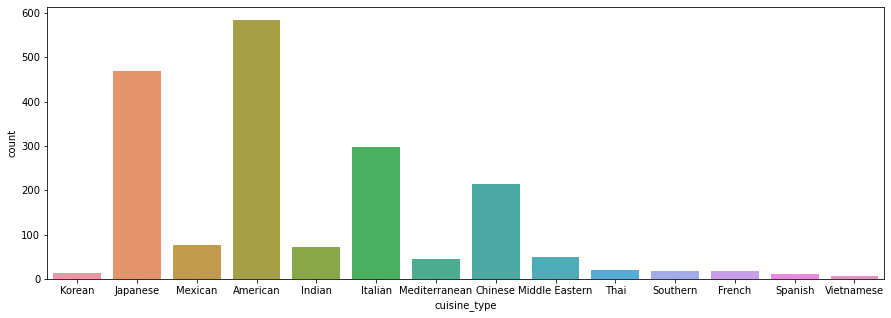

In [13]:
plt.figure(figsize = (15,5))
sns.countplot(data = df, x = 'cuisine_type')

#### Cost of the order

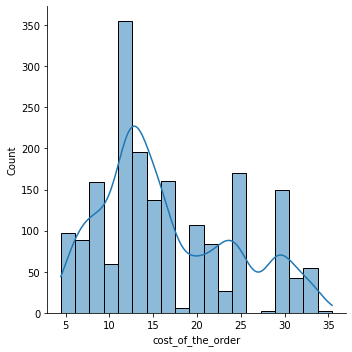

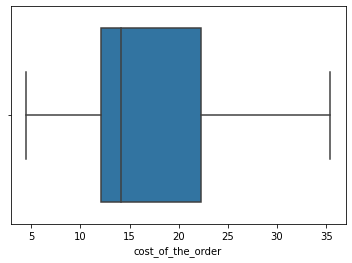

In [14]:
sns.displot(df["cost_of_the_order"], kde=True)
plt.show()
sns.boxplot(data=df,x='cost_of_the_order') ## Boxplot for the cost of order
plt.show() 

#### Day of the week

In [15]:
# # Check the unique values
df['day_of_the_week'].value_counts()

Weekend    1351
Weekday     547
Name: day_of_the_week, dtype: int64

<AxesSubplot:xlabel='day_of_the_week', ylabel='count'>

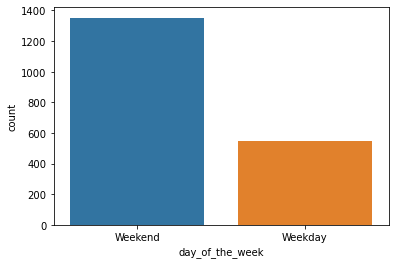

In [16]:
sns.countplot(data = df, x = 'day_of_the_week')

#### Rating

In [17]:
# Check the unique values
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

<AxesSubplot:xlabel='rating', ylabel='count'>

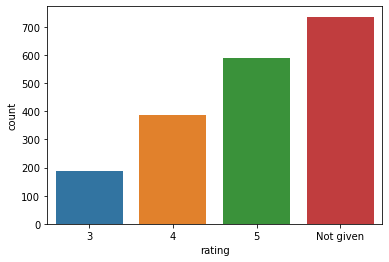

In [18]:
rating_order = ['3', '4', '5', 'Not given']

sns.countplot(data = df, x = 'rating', order=rating_order)

#### Food Preparation time

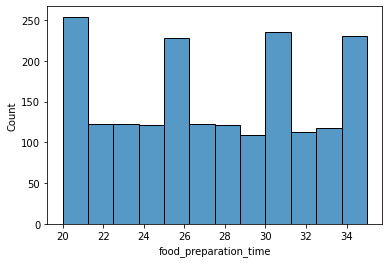

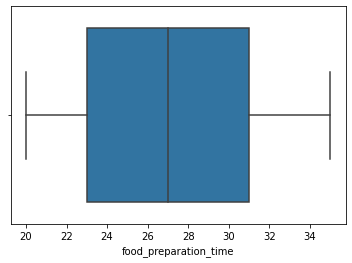

In [19]:
sns.histplot(data=df,x='food_preparation_time') 
plt.show()
sns.boxplot(data=df,x='food_preparation_time') 
plt.show()

#### Delivery time

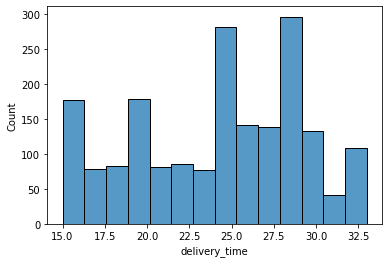

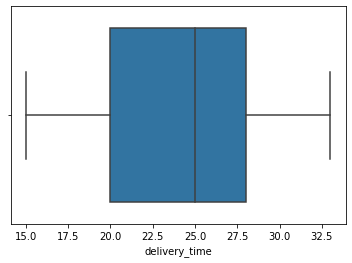

In [20]:
sns.histplot(data=df,x='delivery_time') 
plt.show()
sns.boxplot(data=df,x='delivery_time') 
plt.show()

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [21]:
# Get top 5 restaurants with highest number of orders
df['restaurant_name'].value_counts().head(5)

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

#### Observations:

The top 5 restaurants are as follows:
- Shake Shack
- The Meatball Shop
- Blue Ribbon Sushi
- Blue Ribbon Fried Chicken
- Parm

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [22]:
# Get most popular cuisine on weekends
df_weekend = df[df['day_of_the_week'] == 'Weekend']
df_weekend['cuisine_type'].value_counts()

American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: cuisine_type, dtype: int64

#### Observations:

The most popular cuisine on weekends is **American**. And next are **Japanese, Italian, and Chinese** cuisines. 

### **Question 9**: What percentage of the orders cost more than 20 dollars? [1 marks]

In [23]:
# Get orders that cost above 20 dollars
df_greater_than_20 = df[df['cost_of_the_order']>20]

# Calculate the number of total orders where the cost is above 20 dollars
print(df_greater_than_20.shape[0])

# Calculate percentage of such orders in the dataset
percentage = (df_greater_than_20.shape[0] / df.shape[0]) * 100

print(round(percentage, 2), '%')

555
29.24 %


#### Observations:

- The number of total orders that cost above 20 dollars is: **555**
- Percentage of orders above 20 dollars: **29.24%**

### **Question 10**: What is the mean order delivery time? [1 mark]

In [24]:
# Get the mean delivery time
mean_del_time = df['delivery_time'].mean()

print(round(mean_del_time, 2))

24.16


#### Observations:

The mean delivery time for this dataset is **24.16** minutes

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [25]:
# Get the counts of  each customer_id
df['customer_id'].value_counts().head(3)

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

#### Observations:

Top 3 most frequent customers who are eligible to receive 20% discount vouchers are as follows: 
- Customer **52832** placed 13 orders
- Cusotmer **47440** placed 10 orders 
- Customer **83287** placed 9 orders

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [5 marks]


#### Revenue Generated By Restaurants

In [26]:
df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(14)

restaurant_name
Shake Shack                      3579.53
The Meatball Shop                2145.21
Blue Ribbon Sushi                1903.95
Blue Ribbon Fried Chicken        1662.29
Parm                             1112.76
RedFarm Broadway                  965.13
RedFarm Hudson                    921.21
TAO                               834.50
Han Dynasty                       755.29
Blue Ribbon Sushi Bar & Grill     666.62
Rubirosa                          660.45
Sushi of Gari 46                  640.87
Nobu Next Door                    623.67
Five Guys Burgers and Fries       506.47
Name: cost_of_the_order, dtype: float64

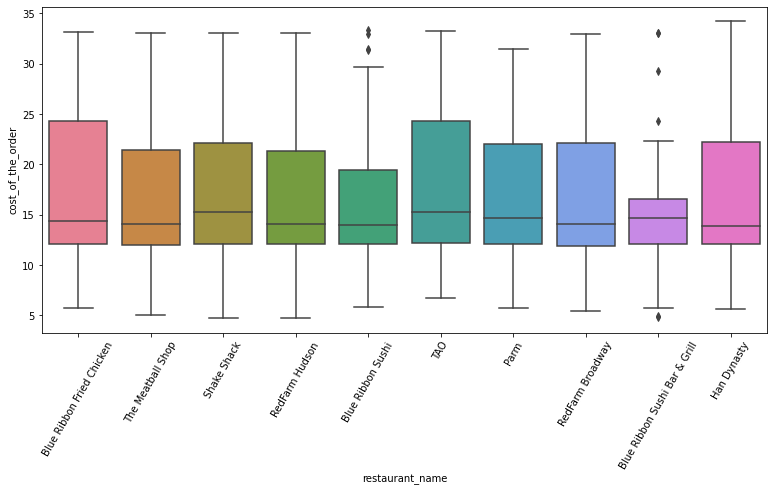

In [27]:
# Group the data by restaurant and calculate the total revenue for each restaurant
revenue_by_restaurant = df.groupby('restaurant_name')['cost_of_the_order'].sum().reset_index()

# Sort the restaurants by revenue in descending order
sorted_restaurants = revenue_by_restaurant.sort_values('cost_of_the_order', ascending=False)

# Select the top 10 restaurants based on revenue
top_10_restaurants = sorted_restaurants.head(10)

# Filter the original DataFrame to include only the data for the top 10 restaurants
df_top_10 = df[df['restaurant_name'].isin(top_10_restaurants['restaurant_name'])]

# Create a boxplot to visualize the relationship between cost of the order and cuisine type for the top 10 restaurants
plt.figure(figsize=(13, 6))
sns.boxplot(x='restaurant_name', y='cost_of_the_order', data=df_top_10, palette='husl')
plt.xticks(rotation=60)
plt.show()

#### Cuisine vs Cost of the order

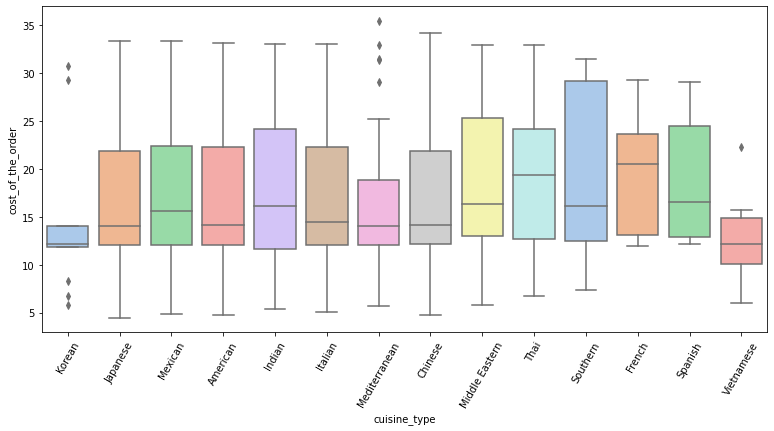

In [28]:
# Relationship between cost of the order and cuisine type
plt.figure(figsize=(13,6))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df, palette = 'pastel')
plt.xticks(rotation = 60)
plt.show()

#### Cuisine vs Food Preparation time

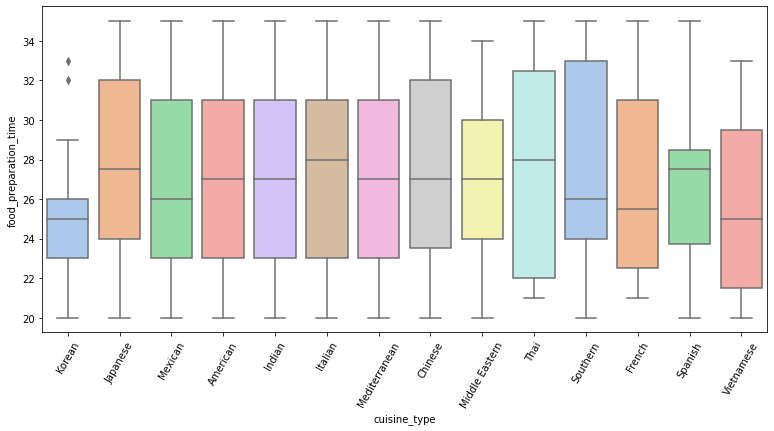

In [29]:
# Relationship between food preparation time and cuisine type
plt.figure(figsize=(13,6))
sns.boxplot(x = "cuisine_type", y = "food_preparation_time", data = df, palette = 'pastel')
plt.xticks(rotation = 60)
plt.show()

#### Day of the Week vs Delivery time

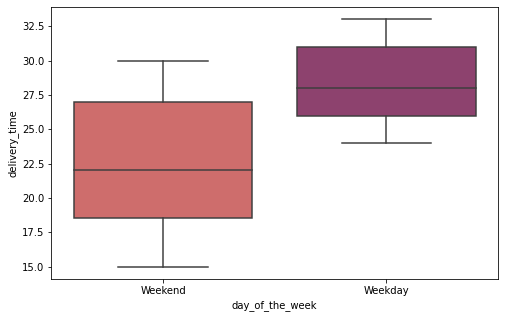

In [30]:
# Relationship between day of the week and delivery time
plt.figure(figsize=(8,5))
sns.boxplot(x = "day_of_the_week", y = "delivery_time", data = df, palette = 'flare')
plt.show()

#### Rating vs Delivery time

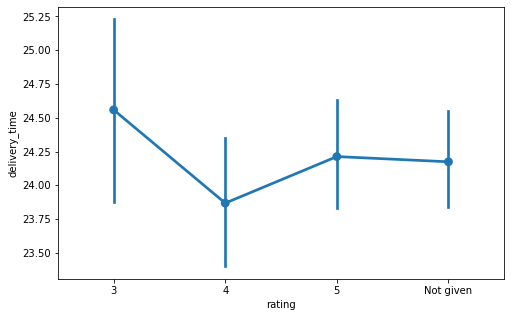

In [31]:
# Relationship between rating and delivery time
plt.figure(figsize=(8, 5))
sns.pointplot(data = df, x = 'rating', y = 'delivery_time', order=rating_order)
plt.show()

#### Rating vs Food preparation time

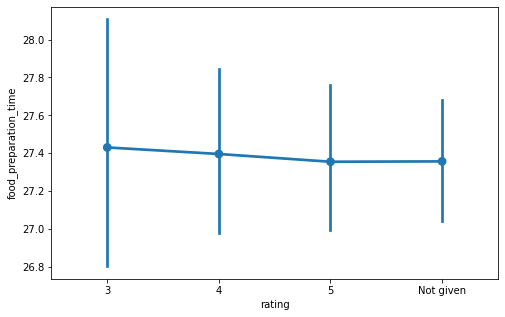

In [32]:
# Relationship between rating and food preparation time
plt.figure(figsize=(8, 5))
sns.pointplot(data = df, x = 'rating', y = 'food_preparation_time', order=rating_order)
plt.show()

#### Rating vs Cost of the order

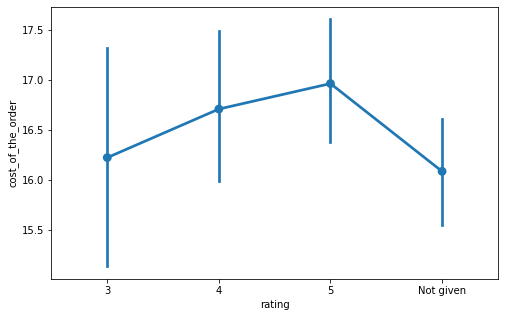

In [33]:
# Relationship between rating and cost of the order
plt.figure(figsize=(8, 5))
sns.pointplot(data = df, x = 'rating', y = 'cost_of_the_order', order=rating_order) 
plt.show()

#### Rating vs Cost of The Order vs Day of the Week 

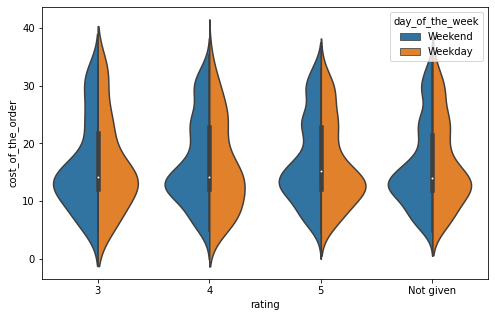

In [34]:
# set the figure size
plt.figure(figsize = (8,5))

# violin plot with addition of the variable 'sex'  
# 'split = True' draws half plot for each of the category of 'sex' 
sns.violinplot(y = 'cost_of_the_order', x = 'rating', data = df, hue = 'day_of_the_week', split = True, order=rating_order)

# display the plot
plt.show()

#### Observations:

- Most of the lowest ratings are caused by food preparation time, delivery time, and the cost of the order. 
- The customer tends to rate the order if the cost is between 10 to 20 dollars, and on weekends.

#### Correlation Among Variables

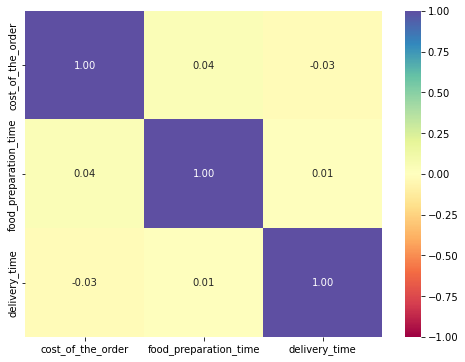

In [35]:
# Plot the heatmap 
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize=(8, 6))
sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

#### Observations:

- There is no main relationship between the cost of order, food preparation, and delivery time. 

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [1.5 marks]

In [36]:
# Filter the rated restaurants
df_rated = df[df['rating'] != 'Not given'].copy()

# Convert rating column from object to integer
df_rated['rating'] = df_rated['rating'].astype('int')  

# Create a dataframe that contains the restaurant names with their rating counts
df_rating_count = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
df_rating_count.head() 

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41


In [37]:
# Get the restaurant names that have rating count more than 50
rest_names = df_rating_count[df_rating_count['rating'] > 50]['restaurant_name']

# Filter to get the data of restaurants that have rating count more than 50
df_mean_4 = df_rated[df_rated['restaurant_name'].isin(rest_names)].copy()

# Group the restaurant names with their ratings and find the mean rating of each restaurant
df_mean_4.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending=False).reset_index().dropna()

,restaurant_name,rating
0,The Meatball Shop,4.511905
1,Blue Ribbon Fried Chicken,4.328125
2,Shake Shack,4.278195
3,Blue Ribbon Sushi,4.219178


#### Observations:

The **Meatball Shop, Blue Ribbon Fried Chicken, Shake Shack, and Blue Ribbon Sushi** have the higher performace among the restaurant that the total rating more than 50 and the average rating greater than 4. 

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [1.5 marks]

In [38]:
#function to determine the revenue
def compute_rev(x):
    if x > 20:
        return x*0.25
    elif x > 5:
        return x*0.15
    else:
        return x*0

df['Revenue'] = df['cost_of_the_order'].apply(compute_rev)
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385


In [39]:
# get the total revenue and print it
total_rev = df['Revenue'].sum()
print(round(total_rev, 2))

6166.3


#### Observations:

The net revenue is around **6166.3** dollars if the company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars.

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [1 marks]

In [40]:
# Calculate total delivery time and add a new column to the dataframe df to store the total delivery time
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

# Get orders that take more than 60 minutes to deliver
df_total_time_greater_than_60 = df[df['total_time'] > 60]

# Calculate the number of orders where the total delivery time is greater than 60 minutes
num_orders_greater_than_60 = df_total_time_greater_than_60.shape[0]

# Calculate the percentage of orders that take more than 60 minutes to deliver
percentage = (num_orders_greater_than_60 / df.shape[0]) * 100

print(round(percentage, 2), '%')

10.54 %


#### Observations:

**10.54%** of orders take more than 60 minutes to get delivered from the time the order is placed.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [1 marks]

In [41]:
# Get the mean delivery time on weekdays and print it
print(round(df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()),
     'minutes')

# Get the mean delivery time on weekend and print it
print(round(df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()),
     'minutes')

28 minutes
22 minutes


#### Observations:

- The mean delivery time on weekdays is around **28** minutes
- The mean delivery time on weekend is around **22** minutes

The delivery time on weekdays is longer than weekend. 

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [5 marks]

### Conclusions:

In conclusion, the analysis of the data provides several key insights for the business.

Firstly, the business has a significant customer base, with a total of 1,200 customers and 178 restaurants. This indicates a promising market presence and potential for growth. The pricing analysis reveals that most orders fall within the $10 to $15 range, with an average order cost of $14. This information can help the business optimize pricing strategies and develop attractive offers for customers within this price range.

Secondly, The analysis of order volumes highlights a higher demand on weekends compared to weekdays, with 1,351 orders on weekends and 547 orders on weekdays. This suggests the need to allocate appropriate resources and staffing levels to efficiently handle weekend orders and ensure timely deliveries. Furthermore, customer ratings play a significant role in shaping the reputation of the business. Encouraging customers to provide ratings and feedback can provide valuable insights for improvement and help identify areas of strength.

Thirdly, the top revenue-generating restaurants and popular cuisines indicate the potential for strategic partnerships and menu optimization. Collaborating closely with these restaurants and focusing on popular cuisines can help attract more customers and increase revenue.

Lastly, addressing areas of improvement such as food preparation time, delivery time, and order cost can enhance customer satisfaction and ratings. Analyzing customer feedback, implementing process improvements, and ensuring consistent quality can contribute to an enhanced customer experience.

### Recommendations:


Theere are some recommendations to help improve the business:

- **Improve Order Accuracy and Timeliness:** Focus on enhancing the accuracy and speed of order preparation and delivery. This can be achieved by streamlining operations, optimizing staffing levels, and implementing efficient order tracking systems.


- **Optimize Pricing Strategy:** Analyze the pricing structure and consider adjusting prices based on popular cuisines, peak hours, and customer preferences. Conduct market research to ensure competitive pricing while maintaining profitability.


- **Expand Menu Options:** Conduct market research to identify customer preferences and introduce new menu items or cuisines that align with customer demands. Offer a variety of options to cater to different tastes and dietary requirements.


- **Monitor and Improve Delivery Performance:** Continuously monitor delivery performance metrics such as delivery time, order accuracy, and customer satisfaction. Identify bottlenecks in the delivery process and implement measures to ensure timely and efficient delivery.


- **Foster Relationships with Restaurants:** Build strong relationships with partner restaurants to ensure consistent quality and timely order preparation. Provide support and training to partner restaurants to maintain high standards.


- **Leverage Data Analytics:** Continuously analyze customer data, order patterns, and feedback to identify trends, preferences, and areas for improvement. Use data-driven insights to make informed business decisions and enhance overall operations.


- **Encourage Online Ordering:** Offer incentives such as exclusive discounts or free delivery for online orders to encourage customers to utilize this convenient option. 


- **Enhance Customer Ratings:** Encourage customers to provide ratings and feedback by incentivizing them or offering discounts for completing a review. This will help gather more feedback and identify areas for improvement.


- **Monitor Competitors:** Keep a close eye on competitors in the market, their offerings, pricing, and customer feedback. Identify unique selling points and opportunities to differentiate the business and attract more customers.


Overall, by implementing these recommendations, the business can enhance operations, optimize pricing, customer satisfaction, increase revenue, improve overall business performance, and maintain a competitive edge in competitive food delivery market. 